<a href="https://www.kaggle.com/code/samithsachidanandan/cs-go-round-winner-prediction?scriptVersionId=267711947" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Importing the Libraries 

In [1]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [2]:
df = pd.read_csv('/kaggle/input/csgo-round-winner-classification/csgo_round_snapshots.csv')

In [3]:
df.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [5]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [6]:
df.duplicated().sum()

4962

In [7]:
df['t_win'] = df.round_winner.astype("category").cat.codes

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

correlations = df[numeric_cols].corr()

top_25 = correlations["t_win"].apply(abs).sort_values(ascending=False).iloc[:25]
print(top_25)

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps                   0.136694
ct_money        

In [9]:
selected_features = correlations["t_win"].apply(abs)[correlations["t_win"].apply(abs) > 0.15].index.tolist()



In [10]:
df_selected = df[selected_features].copy()
df_selected


,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,ct_weapon_awp,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,0.0,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


<Axes: >

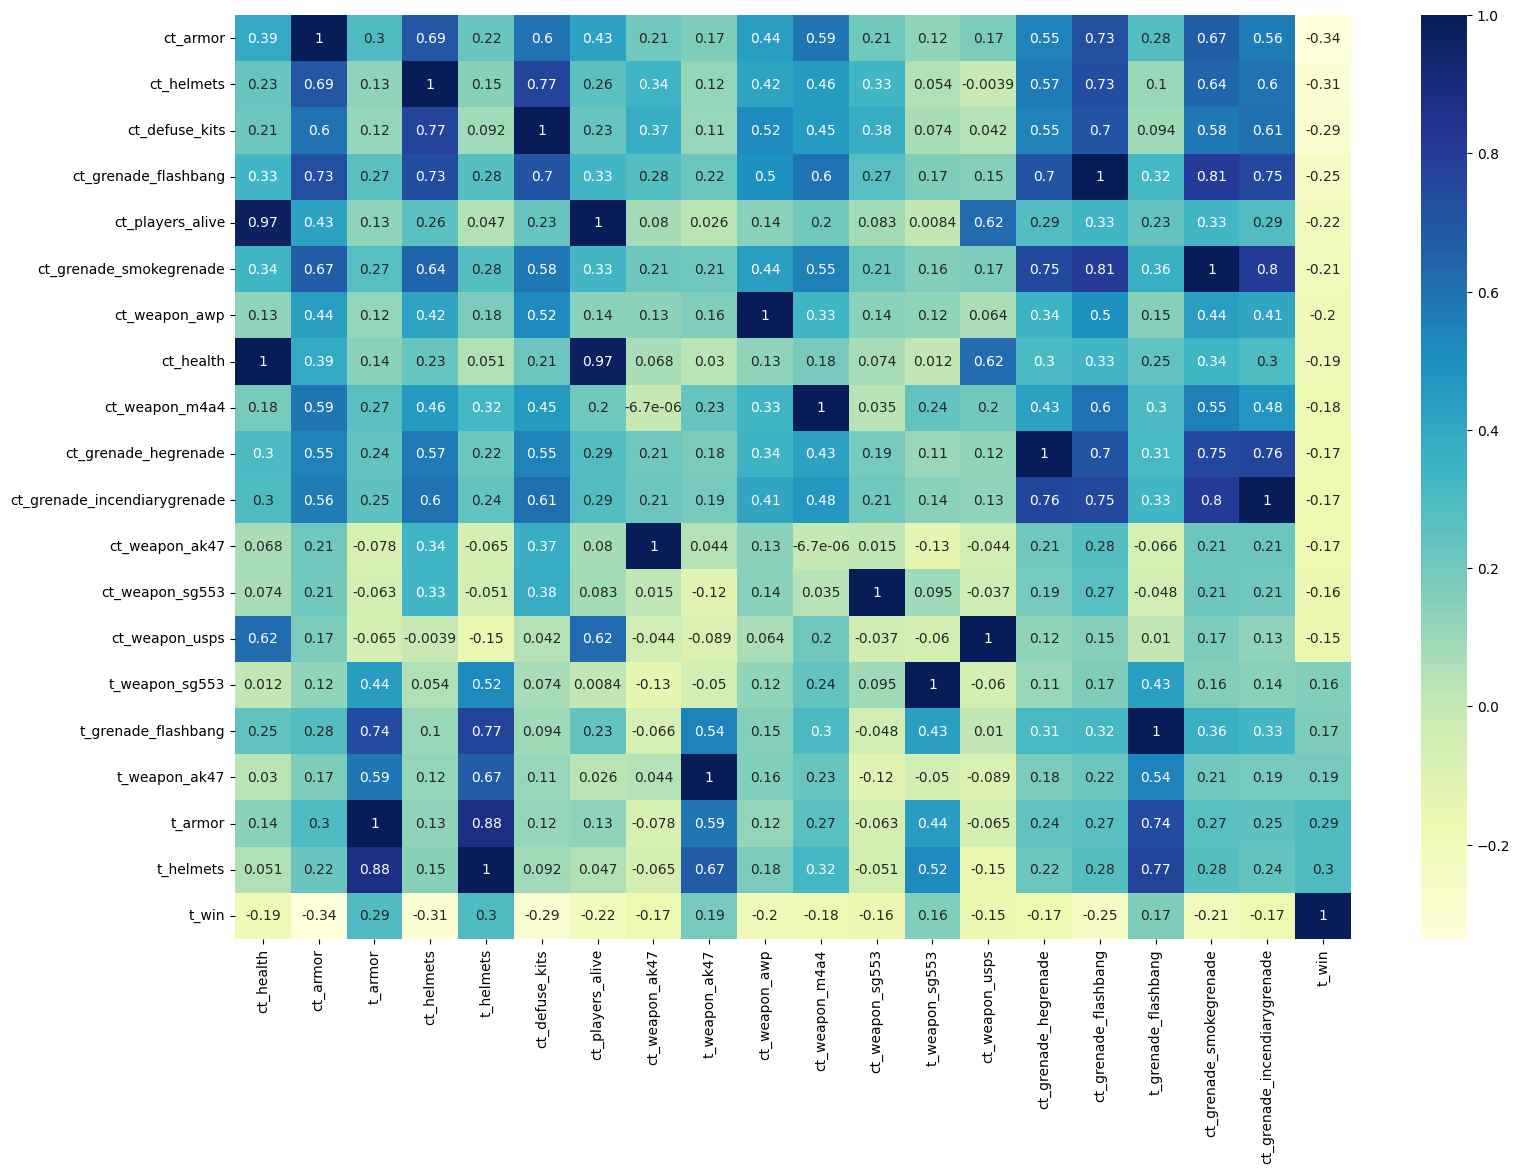

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(df_selected.corr().sort_values(by="t_win"),annot=True,cmap="YlGnBu")

### KNN

In [12]:
from sklearn.model_selection import train_test_split

X,y = df_selected.drop(["t_win"], axis=1), df_selected["t_win"]

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [13]:
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier 

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [14]:
knn.score(X_test_scaled, y_test)

0.768973123110857

### Random Search for KNN

In [15]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_neighbors' : list(range(5,17,2)),
    'weights' : ["unifrom", "distance"]
}

knn = KNeighborsClassifier(n_jobs=4)

clf = RandomizedSearchCV(knn, param_grid, n_jobs=4, n_iter=3, verbose=2, cv=3)
clf.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=4), n_iter=3,
                   n_jobs=4,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['unifrom', 'distance']},
                   verbose=2)

In [16]:
knn = clf.best_estimator_

In [17]:
knn.score(X_test_scaled, y_test)

0.7856384282329875

### Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_jobs=4)
forest.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=4)

In [19]:
forest.score(X_test_scaled, y_test)

0.8296299321950821

### Random Search for Random Forest 

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],        
    'max_depth': [None, 10, 20, 30, 40, 50],    
    'min_samples_split': [2, 5, 10],             
    'min_samples_leaf': [1, 2, 4],               
    'max_features': ['sqrt', 'log2', None],     
    'bootstrap': [True, False]                  
}


rf = RandomForestClassifier(n_jobs=4, random_state=42)


rff = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,       
    cv=3,           
    verbose=2,
    n_jobs=4,
    random_state=42
)

rff.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ...................n_neighbors=13, weights=distance; total time=  19.8s
[CV] END ...................n_neighbors=15, weights=distance; total time=  19.7s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  41.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  42.1s
[CV] END bootstrap=False, max_depth=None, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time= 2.2min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time= 1.1min
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=4, random_state=42),
                   n_iter=20, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 500]},
                   random_state=42, verbose=2)

In [21]:
rf = rff.best_estimator_

In [22]:
rf.score(X_test_scaled, y_test)

0.8321624050322686

### Neural Network with Tensor Flow 

In [23]:
from tensorflow import keras 

model = keras.models.Sequential([
    keras.layers.Input(shape=(19,)),
    keras.layers.Dense(400, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.05),

    keras.layers.Dense(300, activation='relu'),

    keras.layers.Dense(200, activation='relu'),

    keras.layers.Dense(200, activation='relu'),
     

    keras.layers.Dense(100, activation='relu'),
   

    keras.layers.Dense(1, activation='sigmoid'),
])


2025-10-13 10:08:44.280163: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760350124.504378      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760350124.567937      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-13 10:08:58.212800: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [24]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])


In [25]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train, X_valid, y_train_train,y_valid = train_test_split(X_train_scaled,y_train, test_size =0.15)

model.fit(X_train_scaled_train,y_train_train, epochs=30, callbacks=[early_stopping_cb], validation_data=(X_valid,y_valid ) )

Epoch 1/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.7256 - loss: 0.5109 - val_accuracy: 0.7406 - val_loss: 0.4804
Epoch 2/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7433 - loss: 0.4815 - val_accuracy: 0.7434 - val_loss: 0.4768
Epoch 3/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7440 - loss: 0.4767 - val_accuracy: 0.7392 - val_loss: 0.4743
Epoch 4/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.7437 - loss: 0.4788 - val_accuracy: 0.7425 - val_loss: 0.4762
Epoch 5/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7477 - loss: 0.4720 - val_accuracy: 0.7422 - val_loss: 0.4704
Epoch 6/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7495 - loss: 0.4706 - val_accuracy: 0.7457 - val_loss: 0.4706
Epoch 7/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7466 - loss: 0.4702 - val_accuracy: 0.7434 - val_loss: 0.4752
Epoch 8/30
2602/2602 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.7505 - loss: 0

In [26]:
model.evaluate(X_test_scaled, y_test)

766/766 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7492 - loss: 0.4694


[0.4676212966442108, 0.7497753500938416]

### Conclution 

We have trained with KNeighbors, Random Forest and Neural Network and the best model is Random Forest with accuracy of 83.27 %. 